# Multivariate Outliers Detection

https://scikit-learn.org/stable/modules/outlier_detection.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## load data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
data.shape

(150, 5)

# Multivariate OUTLIERS detection for a df

In [4]:
# columns selection
col_x1 = ['petal length (cm)', 'petal width (cm)']
col_x2 = ['sepal length (cm)', 'sepal width (cm)']

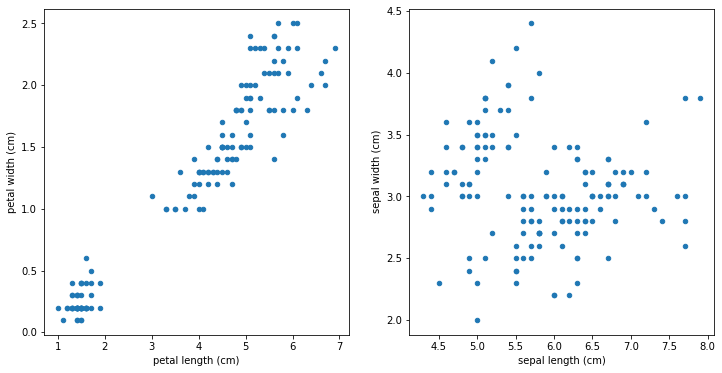

In [5]:
# plot
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))
data[col_x1].plot(kind = 'scatter', x = col_x1[0], y = col_x1[1], ax = ax1)
data[col_x2].plot(kind = 'scatter', x = col_x2[0], y = col_x2[1], ax = ax2)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

In [126]:
## detect multivariate outliers using Local Outlier Factor
def detect_outliers_LOF(X:np.array, n_neighbors:int = 25, n_jobs:int = 2, verbose:bool = False)->np.array:
    """
    Detect multivariate outliers using Local Outlier Factor.
    X -- array of values to be analyzed.
    n_neighbors -- number of neighbors to be used by the algorithm (default, 25).
    n_jobs -- number of jobs to be used (default, 2).
    verbose -- display extra information (default, False).
    return -- array of tagged samples (-1: it is outlier, 1: it is not).
    """
    from sklearn.neighbors import LocalOutlierFactor
    # initialize
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, 
                             algorithm = "auto",
                             metric = 'minkowski',
                             p = 2,
                             contamination="auto",
                             novelty=False,
                             n_jobs = n_jobs
                            )  
    # estimate
    try:
        y_pred = clf.fit(X).predict(X)
    except:
        y_pred = clf.fit_predict(X)
    # display
    if verbose:
        print(f'There are {y_pred[y_pred == -1].shape[0]} outliers from {y_pred.shape[0]}.') 
    # return
    return y_pred




In [139]:
## multivariante outliers detection for a given column of a df
def multivariate_outliers_detection(data:pd.DataFrame, 
                                  col_names: list,
                                  is_remove:bool = True,  
                                  methodology:'function' = detect_outliers_LOF, 
                                  verbose:bool = False)->pd.DataFrame:
    """
    Multivariante outliers detection for a given column of a df.
    data -- dataframe to be analyzed.
    col_names -- columns to be used.
    is_remove -- if removing outliers or just detect (default, True).
    methodology -- function of method to be used to remove / detect outliers (default, detect_outliers_LOF()).
    verbose -- display extra information (default, False).
    return -- df of values without outliers or a mask with detected outliers.
    """
    # validate
    for col in col_names:
        assert col in data.columns.tolist()
    # initialize if just detection
    if not is_remove:
        df_mask = pd.DataFrame(np.zeros(data[col_names].shape, dtype=bool), columns = col_names)
    # outliers detection
    y_pred = methodology(data[col_names].values, n_neighbors = 25, verbose = verbose)  
    # number of outliers
    num_outliers = len(y_pred[y_pred == -1])
    # validate
    if num_outliers > 0:
        # if removing
        if is_remove:
            # add labels
            data['label'] = y_pred
            # filter
            ni = len(data)
            data = data[data.label == 1]
            nf = len(data)
            # display
            if verbose:
                print(f'It was removed {ni - nf} records.')
            # remove unnecessary column
            data.drop('label', axis = 1, inplace = True)
        # if just detection
        else:
            # loop of columns
            for col in col_names:
                # inpute True if it is an outlier
                df_mask[col] = [True if v == -1 else False for v in y_pred]
    # return 
    if is_remove:
        return data
    else:
        return df_mask

In [149]:
col_x = col_x1 + col_x2
dfr = multivariate_outliers_detection(data, col_x, is_remove = True, verbose = True)

There are 6 outliers from 150.
It was removed 6 records.


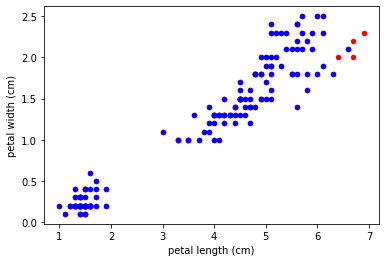

In [153]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
col_x = col_x1
data.plot(kind='scatter', x = col_x[0], y = col_x[1], color = 'red', ax = ax)
dfr.plot(kind='scatter', x = col_x[0], y = col_x[1], color = 'blue', ax = ax)
plt.show()

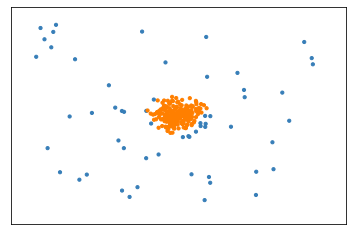

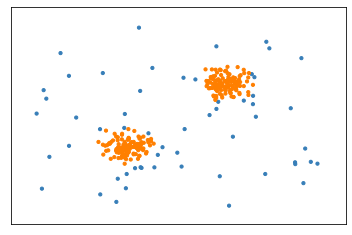

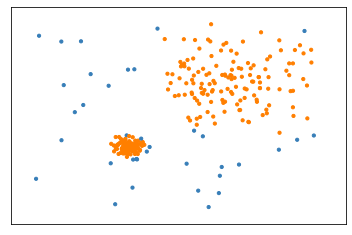

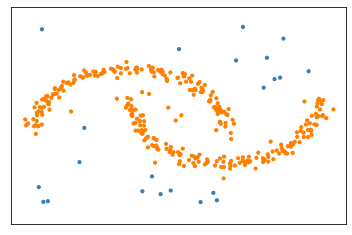

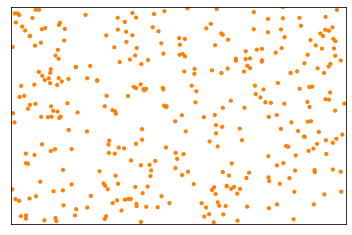

In [154]:

import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers


# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]



rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets[:]):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)


    fig, ax = plt.subplots()

    y_pred = detect_outliers_LOF(X)
 

    
    colors = np.array(["#377eb8", "#ff7f00"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks(())
    plt.yticks(())

    plot_num += 1

    plt.show()